In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import os
import datetime as dt
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import cmocean
import json
import f90nml
import seaborn as sns
from collections import OrderedDict
from scipy.stats.mstats import gmean
from scipy import stats
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.sandbox.stats.multicomp import multipletests
#from bioinfokit.analys import get_data
import numpy as np
import pandas as pd
from statannotations.Annotator import Annotator
import time
import itertools


fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display



%matplotlib inline



In [2]:
Phen=pd.read_excel('/ocean/ksuchy/MOAD/observe/Phenology_AnnualChlEnviros_HeatMap_revised.xlsx',engine='openpyxl')

In [3]:
Phen

,Year,Bloom_Start,Bloom_Intensity,Bloom_Magnitude,Wind (Jan-May),PAR (Feb-May),SST,SpringSST,SSS (Jan-May),Salinity 0-100m (Jan-May),Stratification,Fraser Peak Discharge,Upwelling,SOI,NPGO,PDO
0,2003,97,7.366020,22.098060,179.602991,28.028161,11.704155,8.73,26.848019,29.638905,1.730383,7300,-62.4,-3.183333,0.600020,0.969167
1,2004,65,7.420591,44.523544,154.815458,33.586884,12.508089,9.36,28.070526,29.512319,1.374660,6650,-46.8,-4.783333,0.215131,0.345000
2,2005,49,8.778983,70.231863,174.346284,31.698740,11.684605,8.98,27.302900,29.671067,1.680199,7460,-19.8,-3.566667,-1.071589,0.341667
3,2006,81,8.157230,65.257837,194.916662,29.317230,11.474247,8.29,27.503978,29.417857,1.718726,7190,-29.0,-2.108333,-0.404291,0.190833
4,2007,113,10.731456,42.925823,219.147563,28.016314,10.894669,8.03,26.839565,29.473785,1.730587,10800,-10.6,1.125000,0.416656,-0.195833
5,2008,113,6.201102,18.603307,203.893348,30.914679,10.914407,8.05,28.020936,29.596961,1.232513,10200,-6.4,10.116667,1.406427,-1.292500
6,2009,97,9.003710,63.025973,195.657518,32.744737,11.584757,7.73,28.431971,29.953254,0.979950,7490,-3.8,-0.325000,0.410149,-0.611667
7,2010,97,8.252987,33.011949,213.229882,28.988827,11.321232,8.14,27.424543,29.500414,1.495816,5950,-79.8,9.816667,1.242465,-0.312500
8,2011,89,6.554380,26.217519,209.502007,28.195381,10.969439,7.50,27.832349,29.413295,1.279028,9850,-30.0,13.300000,0.832926,-1.230833
9,2012,81,10.395179,51.975895,260.819058,30.618030,11.431465,8.18,28.139607,29.533247,1.505906,11700,-37.6,-0.766667,1.356315,-1.100000


In [4]:
Phen.keys()

Index(['Year', 'Bloom_Start', 'Bloom_Intensity', 'Bloom_Magnitude',
       'Wind (Jan-May)', 'PAR (Feb-May)', 'SST', 'SpringSST', 'SSS (Jan-May)',
       'Salinity 0-100m (Jan-May)', 'Stratification', 'Fraser Peak Discharge',
       'Upwelling', 'SOI', 'NPGO', 'PDO'],
      dtype='object')

In [5]:
Phen.drop(labels=['Year','Salinity 0-100m (Jan-May)','SST','Upwelling'],axis=1,inplace=True)

In [6]:
Phen.rename(columns={'Wind (Jan-May)':'Wind','PAR (Feb-May)':'PAR','SSS (Jan-May)':'SSS','SpringSST':'SST','Fraser Peak Discharge':'Fraser River Discharge','Bloom_Start':'Bloom Initiation','Bloom_Intensity':'Bloom Intensity','Bloom_Magnitude':'Bloom Magnitude'},inplace=True)

In [7]:
Phen.keys()

Index(['Bloom Initiation', 'Bloom Intensity', 'Bloom Magnitude', 'Wind', 'PAR',
       'SST', 'SSS', 'Stratification', 'Fraser River Discharge', 'SOI', 'NPGO',
       'PDO'],
      dtype='object')

In [8]:
Phen.cov()

,Bloom Initiation,Bloom Intensity,Bloom Magnitude,Wind,PAR,SST,SSS,Stratification,Fraser River Discharge,SOI,NPGO,PDO
Bloom Initiation,400.879121,-16.515985,-251.065694,333.462541,-19.890087,-9.546374,9.612327,-2.611680,1.449582e+04,86.762637,12.434604,-10.518095
Bloom Intensity,-16.515985,4.089189,28.016378,-12.258216,0.596857,0.493906,-1.130717,0.420482,4.599395e+02,-7.745543,-0.843090,0.732891
Bloom Magnitude,-251.065694,28.016378,385.201998,-242.477029,15.246840,4.025378,0.831899,2.966814,-1.702765e+03,-85.541469,-12.600591,6.444675
Wind,333.462541,-12.258216,-242.477029,934.225330,-23.231546,-13.795278,11.240583,-3.499147,2.703313e+04,111.767816,18.785235,-20.356082
PAR,-19.890087,0.596857,15.246840,-23.231546,3.185384,0.600624,-0.150537,-0.125219,-1.026930e+03,-5.885976,-0.506442,0.400428
SST,-9.546374,0.493906,4.025378,-13.795278,0.600624,0.469787,-0.788184,0.075764,-6.173170e+02,-3.317091,-0.346118,0.553806
SSS,9.612327,-1.130717,0.831899,11.240583,-0.150537,-0.788184,3.091580,-0.060251,1.259278e+03,3.167515,0.438227,-0.986008
Stratification,-2.611680,0.420482,2.966814,-3.499147,-0.125219,0.075764,-0.060251,0.100511,1.830318e+01,-1.030434,-0.143837,0.135109
Fraser River Discharge,14495.824176,459.939527,-1702.764667,27033.125974,-1026.929536,-617.317033,1259.278316,18.303179,3.568699e+06,3518.982601,513.017515,-996.948535
SOI,86.762637,-7.745543,-85.541469,111.767816,-5.885976,-3.317091,3.167515,-1.030434,3.518983e+03,45.049951,4.051232,-5.113628


In [9]:
def annot(cor,p):
    if p<0.01:
        istr=f'{cor:.2f}**'
    elif p<0.05:
        istr=f'{cor:.2f}*'
    else:
        istr=f'{cor:.2f}'
    return istr

In [10]:
def getPearsonR(idf):
    ll=np.shape(idf)[1]
    cors=np.empty((ll,ll))
    ps=np.empty((ll,ll))
    nots=np.empty((ll,ll),dtype="<U10")
    for ii in range(0,ll):
        for jj in range(0,ll):
            cors[ii,jj],ps[ii,jj]=stats.pearsonr(idf.iloc[:,ii],idf.iloc[:,jj])
    for ii in range(0,ll):
        for jj in range(0,ll):
            nots[ii,jj]=annot(cors[ii,jj],ps[ii,jj])
    for ii in range (0,ll):
        nots[ii,ii]=""
    return cors,ps,nots

In [11]:
icor,ip,inot=getPearsonR(Phen) #icor = correlation, ip = pvalue, inot=annotation

In [12]:
ip

array([[0.00000000e+00, 1.47647477e-01, 1.39079282e-02, 4.39076636e-02,
        3.87041592e-02, 5.73385928e-03, 3.44912827e-01, 1.43849450e-01,
        1.76174974e-01, 1.26350013e-02, 2.03479645e-03, 4.65747088e-02],
       [1.47647477e-01, 0.00000000e+00, 4.78373632e-03, 4.96701856e-01,
        5.72073070e-01, 2.11087481e-01, 2.67844865e-01, 1.08664334e-02,
        6.81811882e-01, 3.30723270e-02, 6.67151913e-02, 1.90212010e-01],
       [1.39079282e-02, 4.78373632e-03, 0.00000000e+00, 1.51737823e-01,
        1.19819340e-01, 2.98662136e-01, 9.34805850e-01, 8.47378746e-02,
        8.76113734e-01, 1.19666875e-02, 1.14075449e-03, 2.38567191e-01],
       [4.39076636e-02, 4.96701856e-01, 1.51737823e-01, 2.70366809e-95,
        1.28949185e-01, 1.04465900e-02, 4.72986402e-01, 2.04625361e-01,
        9.13363402e-02, 4.39489498e-02, 2.39976207e-03, 7.01702309e-03],
       [3.87041592e-02, 5.72073070e-01, 1.19819340e-01, 1.28949185e-01,
        1.73034758e-93, 7.46196962e-02, 8.70639609e-01, 4.47

In [13]:
icor

array([[ 1.        , -0.4079239 , -0.63890515,  0.54489713, -0.55660756,
        -0.69563439,  0.27304332, -0.41143972,  0.38324916,  0.64562281,
         0.74934446, -0.53928569],
       [-0.4079239 ,  1.        ,  0.70590965, -0.19832746,  0.16537525,
         0.35634824, -0.31801327,  0.65587642,  0.12040018, -0.57067137,
        -0.50305061,  0.37205706],
       [-0.63890515,  0.70590965,  1.        , -0.40420392,  0.43526596,
         0.29923455,  0.0241066 ,  0.47680305, -0.04592566, -0.64935962,
        -0.77464534,  0.33708956],
       [ 0.54489713, -0.19832746, -0.40420392,  1.        , -0.42586449,
        -0.65849725,  0.20915717, -0.36110161,  0.46818281,  0.54480839,
         0.74156132, -0.68368633],
       [-0.55660756,  0.16537525,  0.43526596, -0.42586449,  1.        ,
         0.49098827, -0.04797028, -0.22130049, -0.30458239, -0.49134941,
        -0.34237768,  0.23032014],
       [-0.69563439,  0.35634824,  0.29923455, -0.65849725,  0.49098827,
         1.        , -

In [14]:
inot

array([['', '-0.41', '-0.64*', '0.54*', '-0.56*', '-0.70**', '0.27',
        '-0.41', '0.38', '0.65*', '0.75**', '-0.54*'],
       ['-0.41', '', '0.71**', '-0.20', '0.17', '0.36', '-0.32', '0.66*',
        '0.12', '-0.57*', '-0.50', '0.37'],
       ['-0.64*', '0.71**', '', '-0.40', '0.44', '0.30', '0.02', '0.48',
        '-0.05', '-0.65*', '-0.77**', '0.34'],
       ['0.54*', '-0.20', '-0.40', '', '-0.43', '-0.66*', '0.21',
        '-0.36', '0.47', '0.54*', '0.74**', '-0.68**'],
       ['-0.56*', '0.17', '0.44', '-0.43', '', '0.49', '-0.05', '-0.22',
        '-0.30', '-0.49', '-0.34', '0.23'],
       ['-0.70**', '0.36', '0.30', '-0.66*', '0.49', '', '-0.65*',
        '0.35', '-0.48', '-0.72**', '-0.61*', '0.83**'],
       ['0.27', '-0.32', '0.02', '0.21', '-0.05', '-0.65*', '', '-0.11',
        '0.38', '0.27', '0.30', '-0.58*'],
       ['-0.41', '0.66*', '0.48', '-0.36', '-0.22', '0.35', '-0.11', '',
        '0.03', '-0.48', '-0.55*', '0.44'],
       ['0.38', '0.12', '-0.05', '0.47', '

In [15]:
np.shape(Phen)

(14, 12)

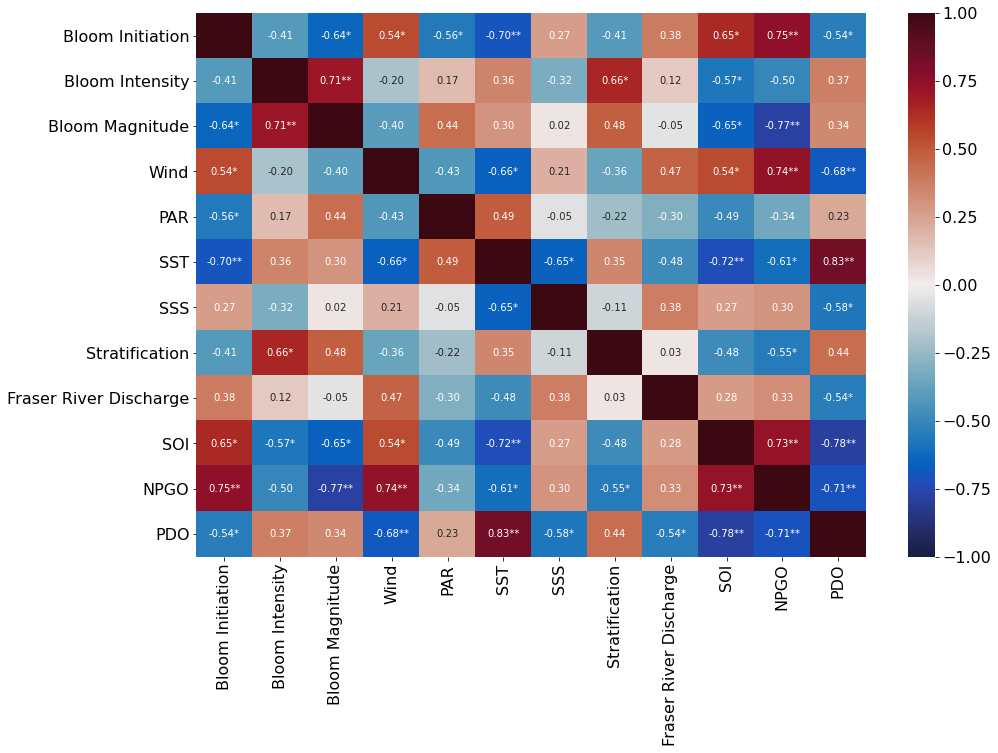

In [17]:
plt.subplots(figsize=(15,10))
cm1=cmocean.cm.balance
#mask=np.invert(np.tril(p_values<0.05))
sns.heatmap(Phen.corr(),annot = inot,cmap=cm1,vmin=-1,vmax=1,fmt = '') 
#plt.savefig('PhenologyCorrelationHeatMap.jpg',bbox_inches='tight')
#plt.savefig('Fig5PhenologyCorrelationHeatMap_revised.jpg', bbox_inches='tight',dpi=1000,transparent=False)


